# Ford GoBike Data - Exploratory Analysis
## by Emuejevoke Eshemitan

## Table of Contents
<ul>
<li><a href="#assessment">Data Assessment</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
<li><a href="#conculsion">Conculsion</a></li>
</ul>

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area for the month of February 2019


### Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape

(183412, 16)

<a id='assessment'></a>
## Data Assessment

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
df[df['member_gender'].isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.6630,2019-02-01 01:42:36.8780,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.3660,2019-02-01 01:39:05.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.4200,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


In [8]:
df[df['start_station_id'].isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.5440,2019-02-02 12:27:12.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,2019-02-01 12:59:45.9690,2019-02-01 13:04:55.4260,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
179970,659,2019-02-01 12:17:37.6750,2019-02-01 12:28:37.0140,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
180106,2013,2019-02-01 11:33:55.1470,2019-02-01 12:07:28.9400,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


## Data Assesment Result

### Quality Issues
1. start_station_id, start_station_name, start_station_latitude, member_birth_year, member_gender has null values
2. start_time and end_time columns are object dtype
3. start_station_id, end_station_id and bike_id columns are int64 dtype
4. start_station_latitude, start_station_longitude, end_station_latitude, and end_station_longitude columns are float64 dtype
5. user_type, bike_share_for_all_trip, member_gender are object dtype
6. member_birth_year is float dtype
7. new columns can be extracted

<a id='cleaning'></a>
## Data Cleaning

#### Create copies of original

In [9]:
 df_clean = df.copy()

#### **Issue 1:** start_station_id, start_station_name, start_station_latitude, member_birth_year, member_gender has null values
**Define:** Drop the rows with missing values
#### Code:

In [10]:
df_clean.dropna(inplace=True)
df_clean = df_clean.reset_index(drop=True)

#### Test

In [11]:
df_clean.isnull().sum(0)

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### **Issue 2:** start_time and end_time columns are object dtype
**Define:** Convert start_time and end_time to pandas datetime dtype
#### Code:

In [12]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

#### Test:

In [13]:
print(df_clean['start_time'].dtype)
print(df_clean['end_time'].dtype)

datetime64[ns]
datetime64[ns]


#### **Issue 3:** start_station_id , end_station_id and bike_id columns are int64 dtype
**Define:** Convert start_station_id, end_station_id and bike_id columns to object dtype
#### Code:

In [14]:
df_clean['start_station_id'] = df_clean['start_station_id'].astype(object)
df_clean['end_station_id'] = df_clean['end_station_id'].astype(object)
df_clean['bike_id'] = df_clean['bike_id'].astype(object)

#### Test:

In [15]:
print(df_clean['start_station_id'].dtype)
print(df_clean['end_station_id'].dtype)
print(df_clean['bike_id'].dtype)

object
object
object


#### **Issue 4:** start_station_latitude, start_station_longitude, end_station_latitude, and end_station_longitude columns are float64 dtype
**Define:** Convert start_station_latitude, start_station_longitude, end_station_latitude, and end_station_longitude columns to object dtype
#### Code:

In [16]:
df_clean['start_station_latitude'] = df_clean['start_station_latitude'].astype(object)
df_clean['start_station_longitude'] = df_clean['start_station_longitude'].astype(object)
df_clean['end_station_latitude'] = df_clean['end_station_latitude'].astype(object)
df_clean['end_station_longitude'] = df_clean['end_station_longitude'].astype(object)

#### Test:

In [17]:
print(df_clean['start_station_latitude'].dtype)
print(df_clean['start_station_longitude'].dtype)
print(df_clean['end_station_latitude'].dtype)
print(df_clean['end_station_longitude'].dtype)

object
object
object
object


#### **Issue 5:** user_type, bike_share_for_all_trip, member_gender are object dtype
**Define:** Convert user_type, bike_share_for_all_trip, member_gender columns to categorical dtype
#### Code:

In [18]:
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype('category')

#### Test:

In [19]:
print(df_clean['user_type'].dtype)
print(df_clean['bike_share_for_all_trip'].dtype)

category
category


#### **Issue 6:** member_birth_year is float dtype
**Define:** Convert member_birth_year to int dtype
#### Code:

In [20]:
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

#### Test:

In [21]:
print(df_clean['member_birth_year'].dtype)

int32


#### **Issue 7:**new columns can be extracted
**Define:** extract the following columns from the datasets
- duration_min
- member_age column
- start_day
- start_hour
#### Code:

#### **duration_min:** 
> We can obtain this by dividing duration_sec by 60.

In [22]:
df_clean['duration_min'] = df_clean['duration_sec'] / 60

#### **member_age column:** 
> We can obtain this by using 2019 as the current year and subtraction member_birth_year from 2019.

In [23]:
df_clean['member_age'] = 2019 - df_clean['member_birth_year']
df_clean.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869.75,35


#### **start_day and start_hour columns:** 

In [24]:
# use strftime() method to scrap the time data
df_clean['start_day'] = df_clean['start_time'].apply(lambda x: x.strftime('%A')).astype('category')
df_clean['start_hour'] = df_clean['start_time'].apply(lambda x: x.strftime('%H')).astype(int)

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  object        
 6   start_station_longitude  174952 non-null  object        
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  object        
 10  end_station_longitude    174952 non-null  object        
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [26]:
df_clean.shape

(174952, 20)

In [27]:
df_clean.sample(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age,start_day,start_hour
17109,151,2019-02-26 20:47:54.604,2019-02-26 20:50:26.470,123.0,Folsom St at 19th St,37.760594,-122.414817,113.0,Franklin Square,37.764555,-122.410345,5552,Subscriber,1986,Male,No,2.516667,33,Tuesday,20
55106,235,2019-02-21 08:10:48.182,2019-02-21 08:14:43.794,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,343.0,Bryant St at 2nd St,37.783172,-122.393572,4381,Subscriber,1987,Male,No,3.916667,32,Thursday,8


### Saving Data

In [28]:
df_clean.to_csv('clean_data.csv', index=False)

### What is the structure of your dataset?

> After cleaning, my dataset is strcutured to have 174,952 observations with 20 features

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in finding out how trip duration (duration_min) is dependent on other features from the dataset.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- duration_min
- user_type
- member_gender	
- bike_share_for_all_trip 
- member_age
- age_group
- start_hour
- start_day
- start_station_name

<a id='univariate'></a>
## Univariate Exploration
> In this section, I would investigate distributions of individual variables. I would take a deeper look to clean things up
and prepare myself to look at relationships between variables.

### How long do most people ride the bike ?

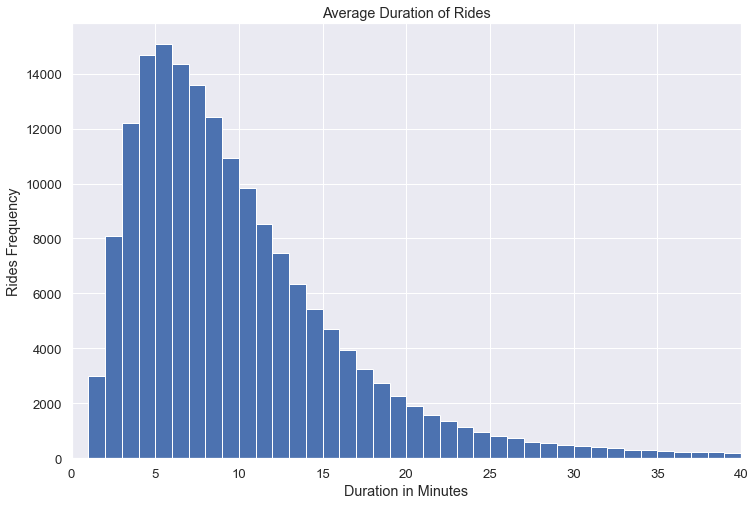

In [29]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(12, 8))
bins = np.arange(0, df_clean['duration_min'].max()+1, 1)
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.xlim([0,40])

plt.title('Average Duration of Rides')
plt.ylabel('Rides Frequency')
plt.xlabel('Duration in Minutes')
plt.show()

**Insight:** Because some outliers on the high end extremely skewed the data, I set a top limit of 40 minutes. It's still right-skewed but we can see that the peak usage falls below 10 mins indicating people are using these bikes for quick rides. In this next plot,will use logarithmic transformation to confirm our analysis.

#### Plotting the logarithmic transformation to confirm the peak usage falls below 10 mins

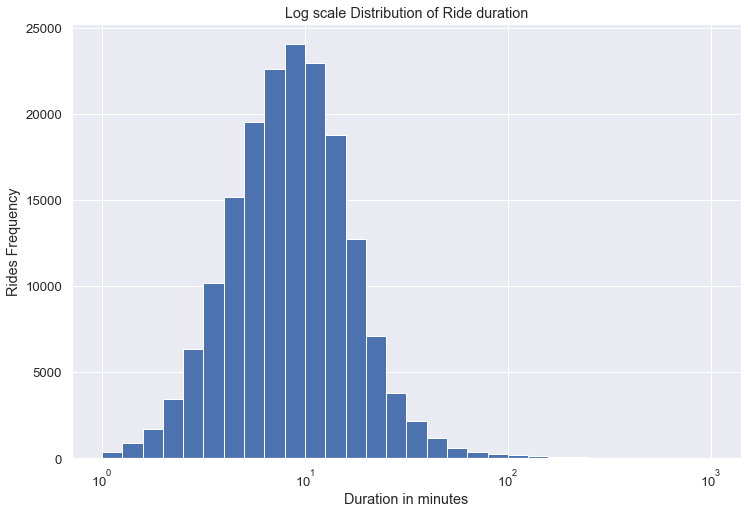

In [30]:
# set bins
bins = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]

plt.figure(figsize=(12, 8))
plt.hist(data = df_clean , x = 'duration_min' , bins = bins);

plt.xscale('log');
plt.title('Log scale Distribution of Ride duration')
plt.xlabel('Duration in minutes')
plt.ylabel('Rides Frequency');

**Insight:** From the plot you can see that we were right. Majority of people have a tendency towards using the bikes for a short-time durational trips (around 10 mins)

**ANSWER:** Most people ride the bike for around 10 minutes

### How Frequently in the day do people tend to ride the bike?

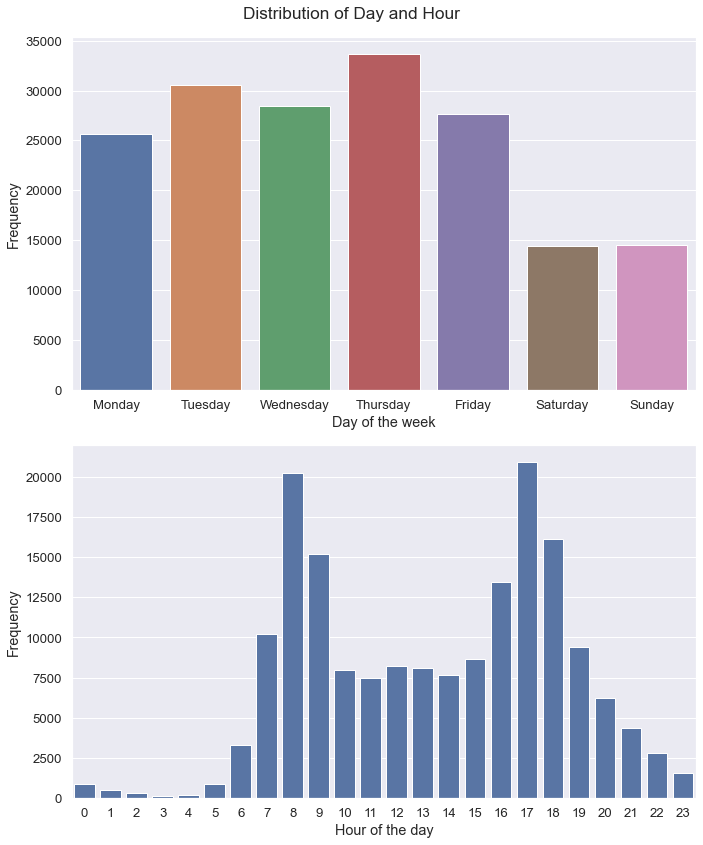

In [31]:
# set the default color
color = sns.color_palette()[0]

# set subplots
fig, ax = plt.subplots(nrows=2, figsize = (10,12))

# order
day_order = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_order = np.arange(0,24)

# plot the Day and Hour
sns.countplot(data = df_clean, x = 'start_day', ax = ax[0], order = day_order, label = 'data')
sns.countplot(data = df_clean, x = 'start_hour', color = color, ax = ax[1], order = hour_order);

# title and labels
fig.suptitle('Distribution of Day and Hour');

for a in ax:
    a.set_ylabel('Frequency')
    
ax[0].set_xlabel('Day of the week')
ax[1].set_xlabel('Hour of the day')

fig.tight_layout();

**Insight:** 
- People tends to ride more frequently during the weekdays than weekends.
- People ride more frequently between 7am to 9pm with the Peak hours between 7-9 AM and 4-6 PM.
- 3am has the lowest ride frequency

**ANSWER:**
People tends to ride more frequently during the weekdays

### What is the age distribution among people taking the rides?

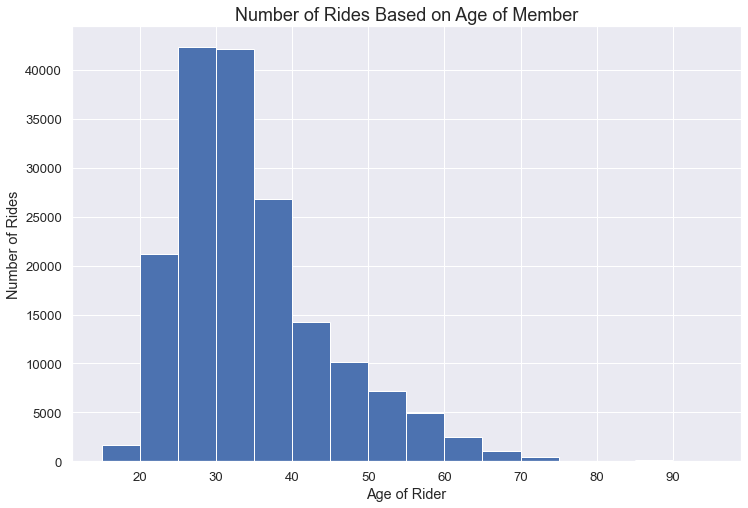

In [32]:
plt.figure(figsize=(12, 8))
bins = np.arange(15, 100, 5)
plt.hist(data = df_clean, x = 'member_age', bins = bins);

plt.title('Number of Rides Based on Age of Member', fontsize = 18);
plt.xlabel('Age of Rider');
plt.ylabel('Number of Rides');

**ANSWER:** Majority of people taking the rides are between age 20 to 40

### What is the gender distribution among people taking the rides?

Text(0, 0.5, 'Number of people')

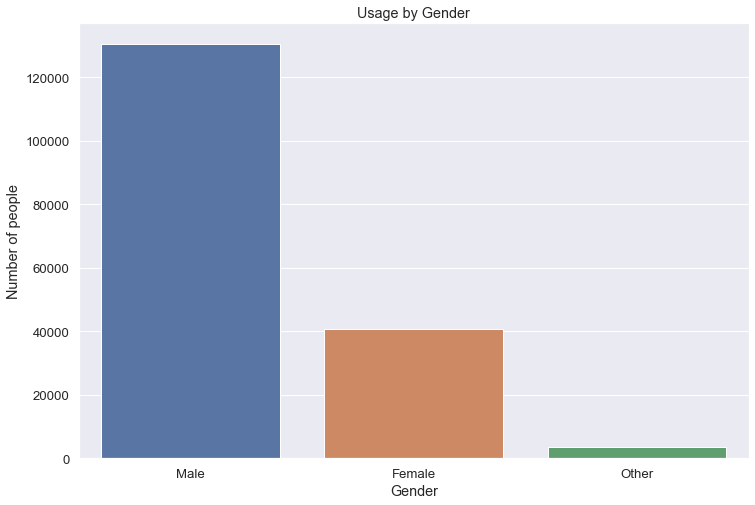

In [33]:
plt.figure(figsize=(12, 8))
df_gender = df_clean['member_gender'].value_counts().index
sns.countplot(data = df_clean, x = 'member_gender', order = df_gender)
plt.title('Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of people')

**ANSWER:**
- There are three gender distribution (Male, Female and Other).
- Majority of the people riding the bikes are Male

### What is the user-type distribution among people taking the rides?

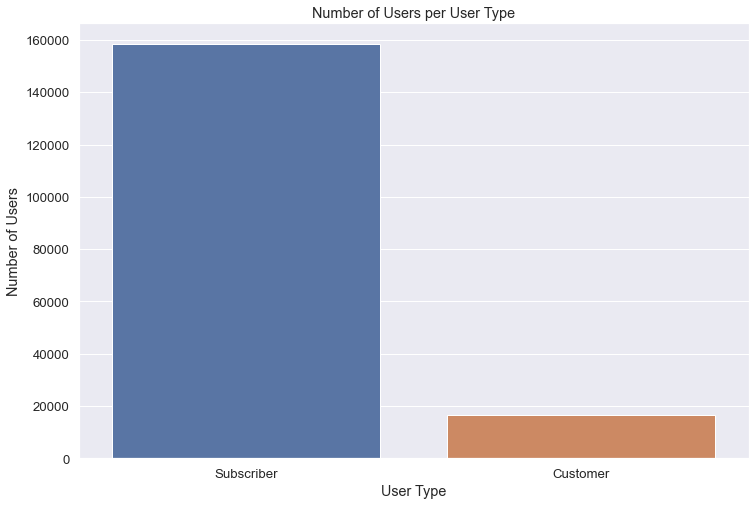

In [34]:
plt.figure(figsize=(12, 8))
df_user = df_clean['user_type'].value_counts().index
sns.countplot(data = df_clean, x = 'user_type', order = df_user)
plt.title('Number of Users per User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.show()

**ANSWER:** 
- There are two categories of users (Subscriber and customer).
- Majority of the people riding the bikes are subscribers

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I performed logarithmic transformation on the duration_minutes column because some outliers on the high end extremely skewed the data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> All cleaning operations were done seperately before selecting the features above. Check cleaning section for more.

<a id='bivariate'></a>
## Bivariate Exploration

> In this section, I would investigate relationships between pairs of variables in my
data that have been introduced in some
fashion in the previous section (univariate exploration).

### Relationship between Ride duration and Rider's Age

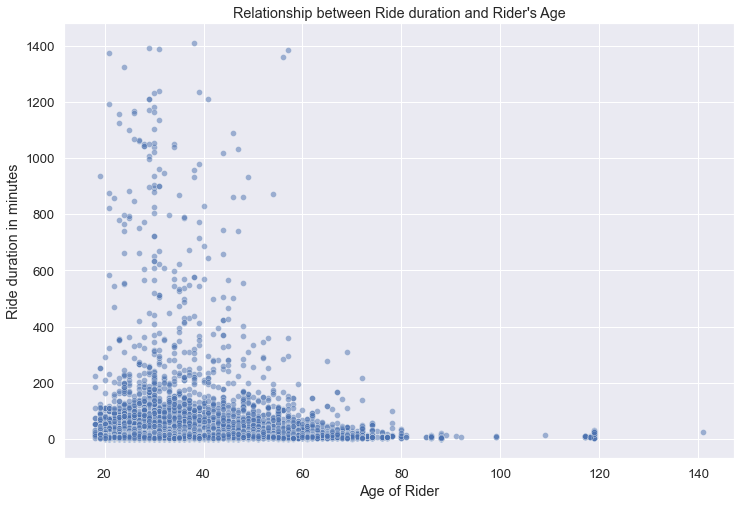

In [35]:
# set figure size
plt.figure(figsize=(12, 8))
sns.set(font_scale = 1.2)
# plot relationship between Ride duration and Rider Age
sns.scatterplot(data = df_clean, x='member_age', y='duration_min', alpha=0.5);

# set title and labels
plt.title('Relationship between Ride duration and Rider\'s Age')
plt.ylabel('Ride duration in minutes')
plt.xlabel('Age of Rider');

**Insight**: The plot is right skewed, where people between the ages of 20 to 60 tend to take the longest rides.

### Relationship between hour of the day, Day of the week and Ride Duration

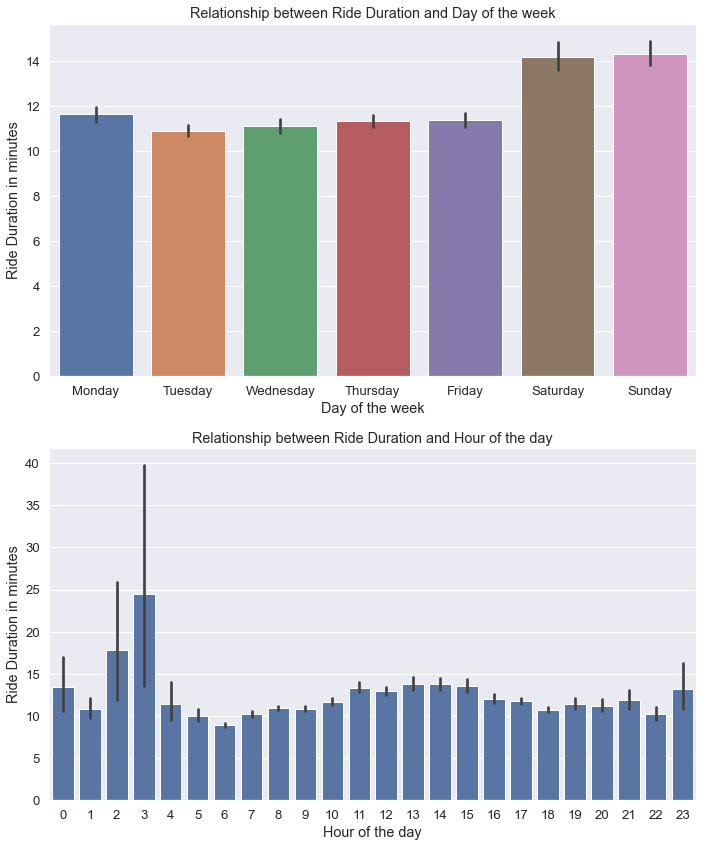

In [36]:
# set the default color
color = sns.color_palette()[0]

# set subplots
fig, ax = plt.subplots(nrows=2, figsize = (10,12))

# order
day_order = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_order = np.arange(0,24)

#plot relationship
sns.barplot(data = df_clean, x = 'start_day', y = 'duration_min', ax = ax[0], order = day_order)
sns.barplot(data = df_clean, x = 'start_hour', y = 'duration_min', ax = ax[1], order = hour_order, color = color)

# title and labels
for a in ax:
    a.set_ylabel('Ride Duration in minutes')
    
ax[0].set_xlabel('Day of the week')
ax[0].set_title('Relationship between Ride Duration and Day of the week')

ax[1].set_xlabel('Hour of the day')
ax[1].set_title('Relationship between Ride Duration and Hour of the day')

fig.tight_layout();

**Insight:**
- Although people tends to ride more frequently during the weekdays, Longer duration of ride are taken during the weekend(saturday and sunday).
- Although 3am has the lowest ride frequency, 3am has the longest ride duration

### Relationship between Start Station and Ride duration

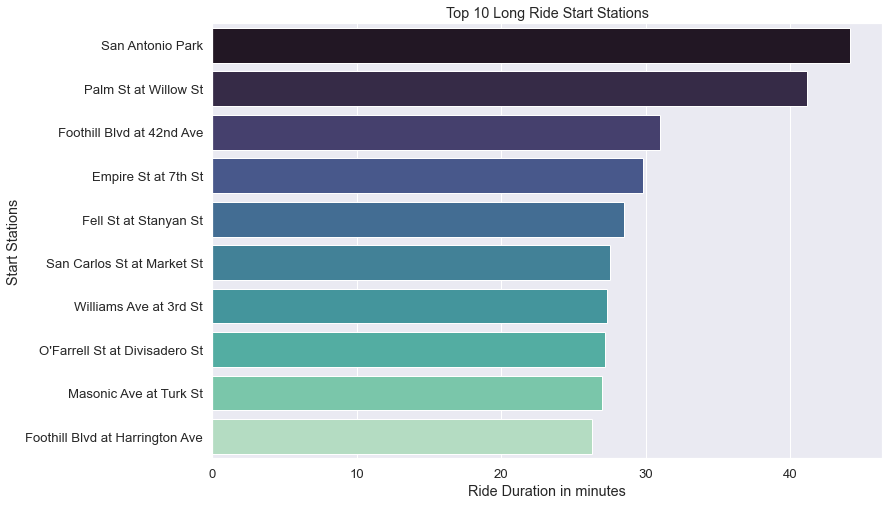

In [37]:
plt.figure(figsize=(12, 8))

# find average ride duration for start station and select the top 10 start stations
start_station  = df_clean.groupby('start_station_name')[['duration_min']].mean().reset_index()
start_station = start_station.sort_values(['duration_min'], ascending = False).head(10)

# plot barplot
sns.barplot(x= 'duration_min', y ='start_station_name', data = start_station, palette = "mako")

# set title and label
plt.title('Top 10 Long Ride Start Stations')
plt.xlabel('Ride Duration in minutes')
plt.ylabel('Start Stations');

**Insight:** The top 3 long ride duration start stations are 
- San Antomio Park
- Palm St at Willow St
- Foothill Blvd at 42nd Ave

### Relationship between Gender and Ride Duration

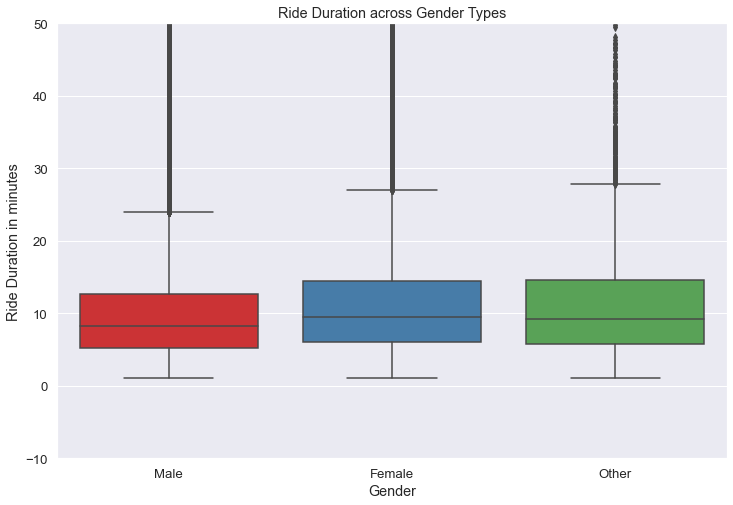

In [38]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.boxplot(x='member_gender', y='duration_min', data = df_clean, palette ='Set1', order=['Male', 'Female', 'Other'])
plt.ylim(-10, 50)
plt.title('Ride Duration across Gender Types')
plt.xlabel('Gender')
plt.ylabel('Ride Duration in minutes')
plt.show()

**Insight:** Though the quantity of male riders are higher then female and other, we can see that higher percentage of female and other rides longer trips then males.

### Relationship between User Type and Ride Duration

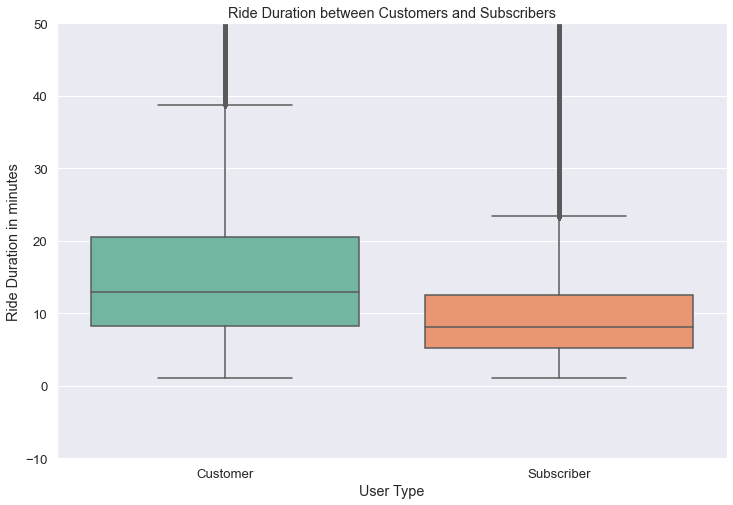

In [39]:
# set figure size
plt.figure(figsize=(12, 8))

sns.boxplot(x='user_type', y='duration_min', data = df_clean, palette ='Set2')
plt.ylim(-10, 50)
plt.title('Ride Duration between Customers and Subscribers')
plt.xlabel('User Type')
plt.ylabel('Ride Duration in minutes')
plt.show()

**Insight:** Higher percentage of customers takes longer rides compared to subscribers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Ride Duration in minutes
  - People between the ages of 20 to 60 tend to take the longest rides.
  - Longer duration of ride are taken during the weekend
  - 3am has the longest ride duration
  - Higher percentage of customers takes longer rides compared to subscribers
  - Female riders takes longer ride durations than Male 
  - San Antomio Park, Palm St at Willow St, Foothill Blvd at 42nd Ave are the top 3 start_stations with the longest ride duration

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Not really, I was more focused on the relationship between ride durations and other features in the dataset.

<a id='multivariate'></a>
## Multivariate Exploration

> In this section, I would create plots of three or more variables to investigate my data even
further.

### Ride Duration Across Ages and Genders

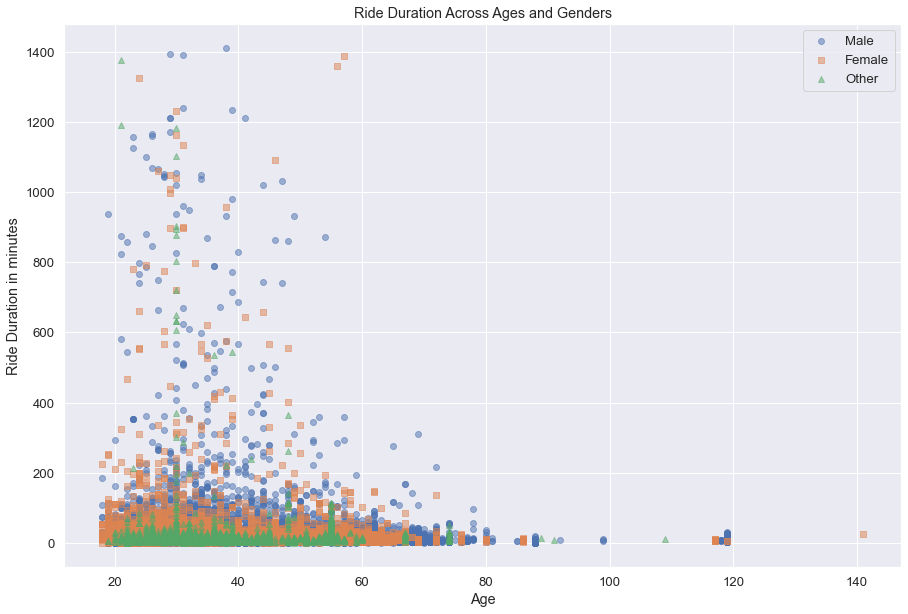

In [40]:
plt.figure(figsize = (15,10))

cat_markers = [['Male', 'o'],
               ['Female', 's'],
               ['Other', '^']]

for cat, marker in cat_markers:
    df_gender = df_clean[df_clean['member_gender'] == cat]
    plt.scatter(data = df_gender, x = 'member_age', y = 'duration_min', marker = marker, alpha = 0.5);
plt.legend(['Male', 'Female', 'Other']);

plt.title('Ride Duration Across Ages and Genders');
plt.xlabel('Age');
plt.ylabel('Ride Duration in minutes');

**Insight:** For all gender, the durations taper off as a person gets older.

### Ride Duration per day per User Type

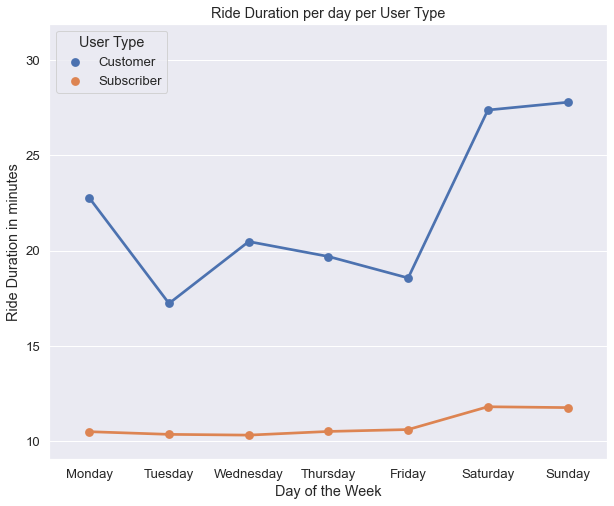

In [41]:
plt.figure(figsize=(22, 8))

# order
day_order = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# plot the point plot of month vs user type
plt.subplot(1, 2, 1)
sns.pointplot(data=df_clean, x='start_day', y='duration_min', hue='user_type', errwidth=0, order = day_order)
plt.xlabel('Day of the Week')
plt.ylabel('Ride Duration in minutes')
plt.title('Ride Duration per day per User Type')
plt.legend(title='User Type');

**Insight:**
- Both customers and users in general will use weekends(saturday and sunday) to take longer rides.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Both customers and users in general will use weekends(saturday and sunday) to take longer rides.

### Were there any interesting or surprising interactions between features?

> It didn't matter the gender, the durations taper off as a person gets older.

<a id='conculsion'></a>
## Conclusions
> From the exploration done in this project, the following were observed:
- Majority of people have a tendency towards using the bikes for a short-time durational trips (around 10 mins)
- Majority of people taking the rides are between age 20 to 40
- Majority of the people riding the bikes are Male
- Majority of the people riding the bikes are subscribers
- People tends to ride more frequently during the weekdays 
- longer duration of rides are taken during the weekend
- Higher percentage of customers takes longer rides compared to subscribers
- Though the quantity of male riders are higher then female and other, higher percentage of female and other, rides longer trips then males.
- San Antomio Park, Palm St at Willow St, Foothill Blvd at 42nd Ave are the top 3 start_stations with the longest ride duration
- For all gender, the durations taper off as a person gets older.

### Limitations
- The dataset contained null values which was dropped during the cleaning procedure
- Our visualization is limited to only the provided dataset.